<a href="https://colab.research.google.com/github/thanhh-le/AI-Class/blob/main/Coding_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1: Predict house prices based on square footage and location


In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Zillow 95014, 95129, 95051 single family houses
data = {
    'square_footage': [
        # 95014 (≈ Cupertino)
        820, 910, 1000, 1100, 1250, 1500, 1800, 2100, 2500, 3000,
        3200, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500,
        800, 950, 1150, 1350, 1550, 1750, 1950, 2150, 2350, 2550,
        2750, 2950, 3150, 3350, 3550, 3750, 3950, 4150, 4350, 4550,
        480, 680, 880, 1080, 1280, 1480, 1680, 1880, 2080, 2280,
        # 95129 (West San Jose near Cupertino)
        900, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500, 2700,
        2900, 3100, 3300, 3500, 3700, 3900, 4100, 4300, 4500, 4700,
        500, 700, 900, 1100, 1300, 1500, 1700, 1900, 2100, 2300,
        2500, 2700, 2900, 3100, 3300, 3500, 3700, 3900, 4100, 4300,
        480, 680, 880, 1080, 1280, 1480, 1680, 1880, 2080, 2280,
        # 95051 (Santa Clara side)
        800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600,
        2800, 3000, 3200, 3400, 3600, 3800, 4000, 4200, 4400, 4600
    ],
    'location': [
        # 95014
        *['95014'] * 50,
        # 95129
        *['95129'] * 50,
        # 95051
        *['95051'] * 20  # note: to reach 100 total, this one has 20 points
    ],
    'price': [
        # 95014
        800000, 900000, 1100000, 1300000, 1600000, 2000000, 2400000, 3000000, 3500000, 4200000,
        4800000, 5500000, 6200000, 7000000, 7800000, 8600000, 9500000, 10400000, 11300000, 12300000,
        850000, 1000000, 1300000, 1600000, 2000000, 2300000, 2700000, 3200000, 3600000, 4100000,
        4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7600000, 8200000, 8800000, 9500000,
        750000, 950000, 1150000, 1350000, 1600000, 1850000, 2100000, 2400000, 2700000, 3000000,
        # 95129
        900000, 1100000, 1300000, 1600000, 1900000, 2200000, 2500000, 2800000, 3200000, 3600000,
        4000000, 4400000, 4800000, 5200000, 5600000, 6000000, 6500000, 7000000, 7500000, 8000000,
        500000, 700000, 900000, 1100000, 1300000, 1600000, 1900000, 2200000, 2500000, 2800000,
        3000000, 3300000, 3600000, 3900000, 4200000, 4500000, 4800000, 5200000, 5600000, 6000000,
        550000, 750000, 950000, 1150000, 1350000, 1600000, 1900000, 2200000, 2500000, 2800000,
        # 95051
        700000, 900000, 1100000, 1300000, 1500000, 1750000, 2000000, 2250000, 2500000, 2750000,
        3000000, 3200000, 3500000, 3800000, 4100000, 4400000, 4700000, 5000000, 5500000, 6000000
    ]
}



df = pd.DataFrame(data)
# display(df)

# Features and target
X = df[['square_footage', 'location']]
y = df['price']

# Preprocessing: One-hot encode the location column
preprocessor = ColumnTransformer(
transformers=[
('location', OneHotEncoder(sparse_output=False), ['location'])
], remainder='passthrough')

# Create pipeline with preprocessing and model
model = Pipeline(steps=[
('preprocessor', preprocessor),
('regressor', LinearRegression())
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Train model
model.fit(X_train, y_train)

# Make prediction for a new house: 2000 sq ft in Downtown
new_house = pd.DataFrame({'square_footage': [2000], 'location': ['95129']})
predicted_price = model.predict(new_house)
print(f"Predicted price for a 2000 sq ft house in 95129: ${predicted_price[0]:,.2f}")

# Display model coefficients
feature_names = (model.named_steps['preprocessor']
.named_transformers_['location']
.get_feature_names_out(['location'])).tolist() + ['square_footage']
coefficients = model.named_steps['regressor'].coef_
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Predicted price for a 2000 sq ft house in 95129: $2,485,461.83

Model Coefficients:
location_95014: 624093.54
location_95051: -664409.28
location_95129: 40315.74
square_footage: 1704.23


#Part 2: Predict Customer Churn

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import random

random.seed(42)

regions = ['North', 'South', 'East', 'West']

# Generate sample customer data
data = {
    'age': [random.randint(18, 65) for _ in range(100)],
    'monthly_usage_hours': [random.randint(5, 100) for _ in range(100)],
    'purchase_amount': [random.randint(50, 500) for _ in range(100)],
    'customer_service_calls': [random.randint(0, 10) for _ in range(100)],
    'region': [random.choice(regions) for _ in range(100)],
    'churn': [random.choice([0, 1]) for _ in range(100)]
}
df = pd.DataFrame(data)

# Features and target
X = df[['age', 'monthly_usage_hours', 'purchase_amount', 'customer_service_calls',
'region']]
y = df['churn']

# Preprocessing: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
transformers=[
('num', StandardScaler(), ['age', 'monthly_usage_hours', 'purchase_amount',
'customer_service_calls']),
('cat', OneHotEncoder(sparse_output=False), ['region'])
])

# Create pipeline with preprocessing and model
model = Pipeline(steps=[
('preprocessor', preprocessor),
('classifier', LogisticRegression(random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict churn probability for a new customer
new_customer = pd.DataFrame({
'age': [35],
'monthly_usage_hours': [20],
'purchase_amount': [150],
'customer_service_calls': [5],
'region': ['West']
})
churn_probability = model.predict_proba(new_customer)[0][1] # Probability of churn

#(class 1)
# Classify based on threshold (0.5)
threshold = 0.5
churn_prediction = 1 if churn_probability > threshold else 0
print(f"Churn Probability for new customer: {churn_probability:.2f}")
print(f"Churn Prediction (1 = churn, 0 = no churn): {churn_prediction}")

# Display model coefficients
feature_names = (model.named_steps['preprocessor']
.named_transformers_['cat']
.get_feature_names_out(['region'])).tolist() + ['age',
'monthly_usage_hours', 'purchase_amount', 'customer_service_calls']
coefficients = model.named_steps['classifier'].coef_[0]
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.2f}")

Churn Probability for new customer: 0.26
Churn Prediction (1 = churn, 0 = no churn): 0

Model Coefficients:
region_East: -0.11
region_North: 0.24
region_South: 0.07
region_West: -0.02
age: 0.69
monthly_usage_hours: 0.03
purchase_amount: 0.13
customer_service_calls: -0.82


#Part 3: Customer Segmentation

In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

random.seed(40)

regions = ['North', 'South', 'East', 'West']

# Generate sample customer data
data = {
    'annual_spending': [random.randint(100, 2000) for _ in range(100)],
    'purchase_frequency': [random.randint(1, 20) for _ in range(100)],
    'age': [random.randint(18, 65) for _ in range(100)],
    'region': [random.choice(regions) for _ in range(100)]
}
df = pd.DataFrame(data)
# Preprocess data: Select numerical features and scale them
features = ['annual_spending', 'purchase_frequency', 'age']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Determine optimal number of clusters using elbow method
inertia = []
K = range(1, 6)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.savefig('elbow_plot.png')
plt.close()
# Apply K-Means with optimal K (e.g., 3 based on elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
# Analyze clusters
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print("Cluster Characteristics:")
print(cluster_summary)
# Example of targeted strategies
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Strategy:")
    if cluster_summary.loc[cluster, 'annual_spending'] > 1000:
        print("High-spending customers: Offer exclusive promotions or loyalty rewards.")
    elif cluster_summary.loc[cluster, 'purchase_frequency'] > 10:
        print("Frequent buyers: Provide bulk discounts or subscription plans.")
    else:
        print("Low-engagement customers: Send personalized re-engagement campaigns.")
    # Save cluster assignments to CSV
    df.to_csv('customer_segments.csv', index=False)

Cluster Characteristics:
         annual_spending  purchase_frequency    age
cluster                                            
0                 774.00                5.68  53.42
1                 924.58                8.48  25.55
2                1393.24               15.37  43.87

Cluster 0 Strategy:
Low-engagement customers: Send personalized re-engagement campaigns.

Cluster 1 Strategy:
Low-engagement customers: Send personalized re-engagement campaigns.

Cluster 2 Strategy:
High-spending customers: Offer exclusive promotions or loyalty rewards.


#Extra credit

Using Colab cache for faster access to the 'walmart-sales' dataset.
Path to dataset files: /kaggle/input/walmart-sales
Files in dataset: ['Walmart_Sales.csv']


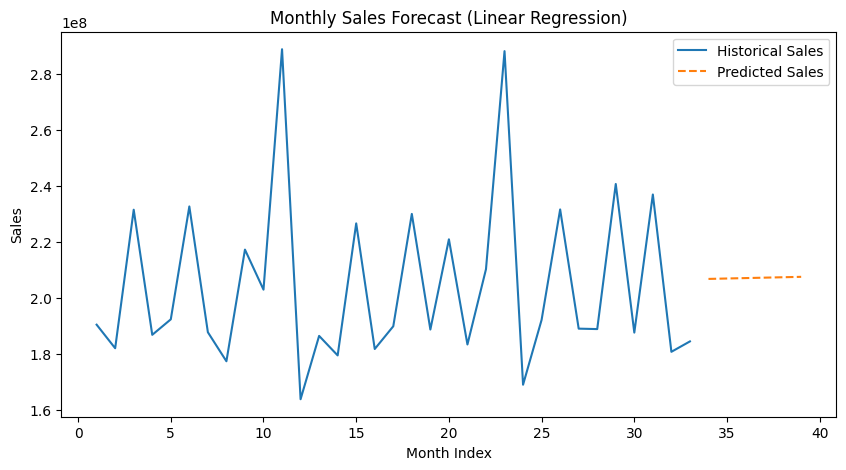

In [52]:
import kagglehub
import os
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("mikhail1681/walmart-sales")

# Load dataset
print("Path to dataset files:", path)
print("Files in dataset:", os.listdir(path))
file_path = os.path.join(path, "Walmart_Sales.csv")
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")


month_sales_df = df[['Date','Weekly_Sales']].copy()
month_sales_df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Aggregate to monthly
monthly_sales = df['Weekly_Sales'].resample('ME').sum().reset_index()

# Extract numeric month index for regression
monthly_sales['month'] = range(1, len(monthly_sales) + 1)

# Features (X) and target (y)
X = monthly_sales[['month']]
y = monthly_sales['Weekly_Sales']

# --- 2. Train regression model ---
model = LinearRegression()
model.fit(X, y)

# --- 3. Predict for next 6 months ---
future_months = pd.DataFrame({'month': range(max(X['month'])+1, max(X['month'])+7)})
predictions = model.predict(future_months)

# --- 4. Plot results ---
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['month'], y, label='Historical Sales')
plt.plot(future_months['month'], predictions, label='Predicted Sales', linestyle='--')
plt.xlabel('Month Index')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecast (Linear Regression)')
plt.legend()
plt.show()